# Performing Data Analysis and Predictive Modeling

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [2]:
# Removing warnings
warnings.filterwarnings("ignore")

In [3]:
#Reading csv
df=pd.read_csv("bikes.csv")

# Data Understanding

In [4]:
#Reading csv
df

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500
...,...,...,...,...,...,...,...,...
7852,Yamaha YZF-R15 150cc 2011,2011,7000 Km,first owner,agra,\n\n 42 kmpl,16 bhp,55000
7853,Bajaj Discover 100cc 2015,2015,Mileage 80 Kmpl,first owner,delhi,\n\n 80 Kmpl,7.7,28000
7854,Bajaj Pulsar 180cc 2016,2016,6407 Km,first owner,bangalore,\n\n 65 kmpl,17 bhp,61740
7855,Bajaj V15 150cc 2016,2016,7524 Km,first owner,bangalore,\n\n 57 kmpl,11.80 bhp,49000


In [5]:
#Checking shape of dataset
df.shape

(7857, 8)

In [6]:
#Displaying first 5 rows of datset
df.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500


In [7]:
#Displaying last 5 rows of datset
df.tail()

,model_name,model_year,kms_driven,owner,location,mileage,power,price
7852,Yamaha YZF-R15 150cc 2011,2011,7000 Km,first owner,agra,\n\n 42 kmpl,16 bhp,55000
7853,Bajaj Discover 100cc 2015,2015,Mileage 80 Kmpl,first owner,delhi,\n\n 80 Kmpl,7.7,28000
7854,Bajaj Pulsar 180cc 2016,2016,6407 Km,first owner,bangalore,\n\n 65 kmpl,17 bhp,61740
7855,Bajaj V15 150cc 2016,2016,7524 Km,first owner,bangalore,\n\n 57 kmpl,11.80 bhp,49000
7856,Bajaj Pulsar 220cc 2016,2016,15000 Km,first owner,chennai,\n\n 38 kmpl,21 bhp,65000


In [8]:
#Display all statistical info of data
df.describe()

,model_year,price
count,7857.000000,7.857000e+03
mean,2015.367698,1.067913e+05
std,4.001443,1.389261e+05
min,1950.000000,0.000000e+00
25%,2014.000000,4.200000e+04
50%,2016.000000,7.500000e+04
75%,2018.000000,1.250000e+05
max,2021.000000,3.000000e+06


In [9]:
#Display all statistical info of data including categorical
df.describe(include="all")

,model_name,model_year,kms_driven,owner,location,mileage,power,price
count,7857,7857.000000,7857,7857,7838,7846,7826,7.857000e+03
unique,1724,NaN,1801,4,561,117,272,NaN
top,Royal Enfield Classic 350cc 2017,NaN,Mileage 65 Kmpl,first owner,delhi,\n\n 35 kmpl,19.80 bhp,NaN
freq,78,NaN,436,6817,1438,1071,922,NaN
mean,NaN,2015.367698,NaN,NaN,NaN,NaN,NaN,1.067913e+05
std,NaN,4.001443,NaN,NaN,NaN,NaN,NaN,1.389261e+05
min,NaN,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,2014.000000,NaN,NaN,NaN,NaN,NaN,4.200000e+04
50%,NaN,2016.000000,NaN,NaN,NaN,NaN,NaN,7.500000e+04
75%,NaN,2018.000000,NaN,NaN,NaN,NaN,NaN,1.250000e+05


In [10]:
#Checking Structural info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7857 entries, 0 to 7856
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   model_name  7857 non-null   object
 1   model_year  7857 non-null   int64 
 2   kms_driven  7857 non-null   object
 3   owner       7857 non-null   object
 4   location    7838 non-null   object
 5   mileage     7846 non-null   object
 6   power       7826 non-null   object
 7   price       7857 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 491.2+ KB


In [11]:
#Checking null values
df.isnull().sum()

model_name     0
model_year     0
kms_driven     0
owner          0
location      19
mileage       11
power         31
price          0
dtype: int64

In [12]:
#Checking null values in percentage
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

model_name    0.000000
model_year    0.000000
kms_driven    0.000000
owner         0.000000
location      0.241823
mileage       0.140003
power         0.394553
price         0.000000
dtype: float64


# Feature Engineering

In [13]:
# Cleaning 'kms_driven'
df["kms_driven"] = df["kms_driven"].astype(str)
df["kms_driven"] = df["kms_driven"].str.replace(" Km", "", regex=True).str.replace(",", "")
df["kms_driven"] = pd.to_numeric(df["kms_driven"], errors="coerce")

# Handling missing values in 'kms_driven' by filling with the median
kms_median = df["kms_driven"].median()
df["kms_driven"].fillna(kms_median, inplace=True)

In [14]:
#Extracting data from mileage column
df["mileage"] = df["mileage"].str.strip().str.replace("\n", "")
def extract_mileage(value):
    if pd.isna(value) or "liquid cooled" in str(value).lower():
        return None  
    range_match = re.findall(r"\d+\.\d+|\d+", str(value))
    if len(range_match) == 2: 
        return (float(range_match[0]) + float(range_match[1])) / 2
    elif len(range_match) == 1:
        return float(range_match[0])
    return None
df["mileage"] = df["mileage"].apply(extract_mileage)

In [15]:
# Convert power column to string and remove leading/trailing spaces
df["power"] = df["power"].astype(str).str.strip()
df["power"] = df["power"].str.extract(r"(\d+\.\d+|\d+)").astype(float)
kw_mask = df["power"].astype(str).str.contains("kW", case=False, na=False)
df.loc[kw_mask, "power"] = df.loc[kw_mask, "power"] * 1.341
df["power"].fillna(df["power"].median(), inplace=True)

In [16]:
# Transforming Owner column
df["owner"] = df["owner"].str.lower().str.strip()
# Map text values to numeric categories
owner_mapping = {
    "first owner": 1,
    "second owner": 2,
    "third owner": 3,
    "fourth owner or more": 4  
}
df["owner"] = df["owner"].map(owner_mapping)

In [17]:
# Imputing missing values in mileage by linear regression
df_known = df[df["mileage"].notna()]
df_missing = df[df["mileage"].isna()]
X_train = df_known[["power"]]
y_train = df_known["mileage"]
model = LinearRegression()
model.fit(X_train, y_train)
X_missing = df_missing[["power"]]
df.loc[df["mileage"].isna(), "mileage"] = model.predict(X_missing)

In [18]:
#Imputing null values of location column by mode
df['location'].fillna(df['location'].mode()[0], inplace=True)

In [19]:
#Transforming location and model name from categorical to numerical using target encoding
from category_encoders import TargetEncoder
df['location_encoded'] = df['location'].map(df['location'].value_counts(normalize=True))
df['model_name_encoded'] = df['model_name'].map(df['model_name'].value_counts(normalize=True))

In [20]:
#Create column location price using 
location_price = df.groupby('location')['price'].mean().sort_values(ascending=False)
print(location_price.head(10)) 

location
maradu         1.200000e+06
daman          1.150000e+06
dimapur        9.500000e+05
raikot         7.800000e+05
hardoi         7.000000e+05
alappuzha      5.200000e+05
rajnandgaon    5.100000e+05
udupi          4.700000e+05
hubli          4.664000e+05
alibag         3.311667e+05
Name: price, dtype: float64


In [21]:
#Using anova to calculate variance
from scipy.stats import f_oneway
location_groups = [df[df['location'] == loc]['price'] for loc in df['location'].unique()]
# Perform ANOVA test
anova_result = f_oneway(*location_groups)
print("ANOVA F-statistic:", anova_result.statistic, "p-value:", anova_result.pvalue)

ANOVA F-statistic: 1.3053094077253553 p-value: 3.7023211685532415e-06


In [22]:
# Feature Engineering creating new columns using old ones
current_year = 2025
df["car_age"] = current_year - df["model_year"]
df["power_per_km"] = df["power"] / df["kms_driven"]
df["mileage_per_km"] = df["mileage"] / df["kms_driven"]
df.replace([np.inf, -np.inf], np.nan, inplace=True)  # Handle division errors
df.fillna(0, inplace=True)  # Fill NaN values

# Data Visualization

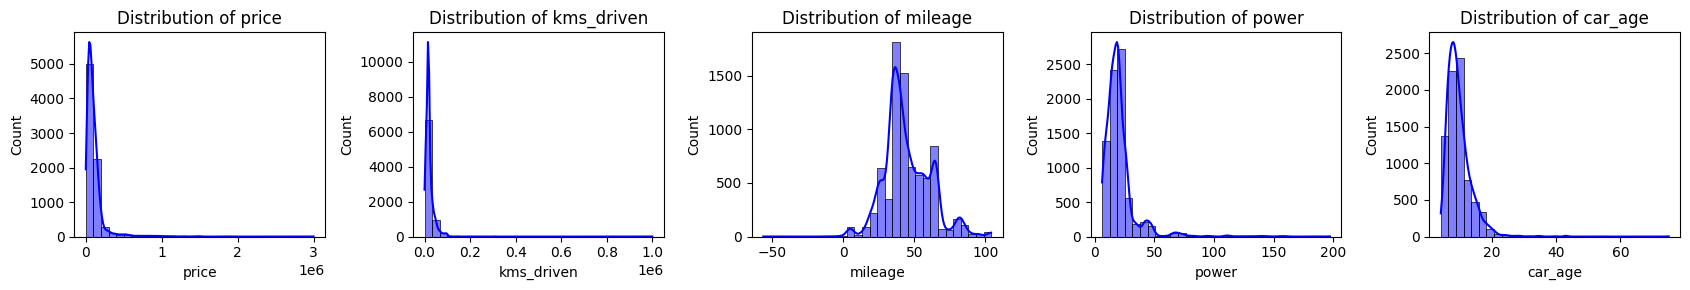

In [23]:
#Plotting histplot to check skewness in data
num_cols = ['price', 'kms_driven', 'mileage', 'power', 'car_age']
plt.figure(figsize=(17, 3))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 5, i)
    sns.histplot(df[col], bins=30, kde=True, color='blue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

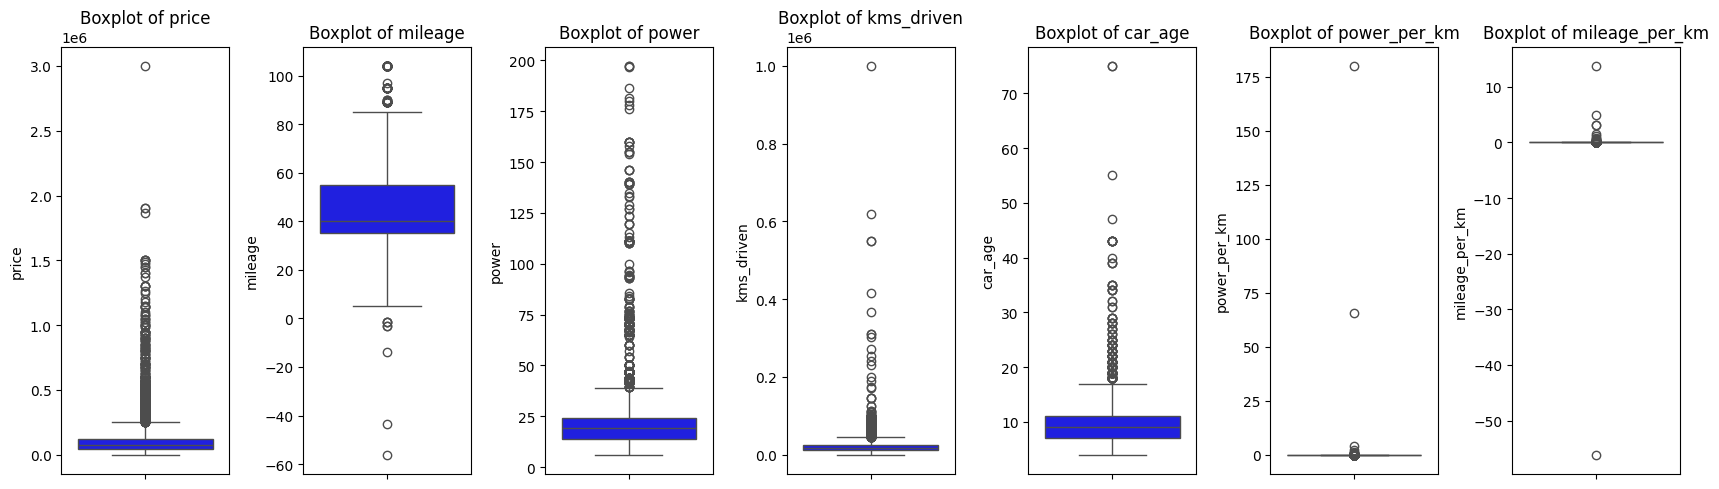

In [24]:
# Plotting box plots for determining outliers
num_cols = ['price', 'mileage', 'power', 'kms_driven','car_age', 'power_per_km', 'mileage_per_km']
plt.figure(figsize=(17, 5))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 7, i) 
    sns.boxplot(y=df[col], color='blue')
    plt.title(f"Boxplot of {col}")
plt.tight_layout()  
plt.show()

In [25]:
from scipy import stats
import pandas as pd
#Apply log to kms_driven to make it normally distributed
df["log_kms_driven"] = np.log1p(df["kms_driven"])
df["log_power"] = np.log1p(df["power"])
df["log_price"] = np.log1p(df["price"])
df["log_car_age"] = np.log1p(df["car_age"])
# ---- Z-Score Outlier Handling ----
def remove_outliers_zscore(df, columns, threshold=3):
    z_scores = stats.zscore(df[columns])
    mask = (abs(z_scores) < threshold).all(axis=1)
    return df[mask]  
df = remove_outliers_zscore(df, ['price', 'mileage', 'power', 'kms_driven','car_age', 'power_per_km', 'mileage_per_km','log_kms_driven'])
# ---- IQR Capping ----
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
for col in ['price', 'mileage', 'power', 'kms_driven','car_age', 'power_per_km', 'mileage_per_km','log_kms_driven']:
    cap_outliers(df, col)

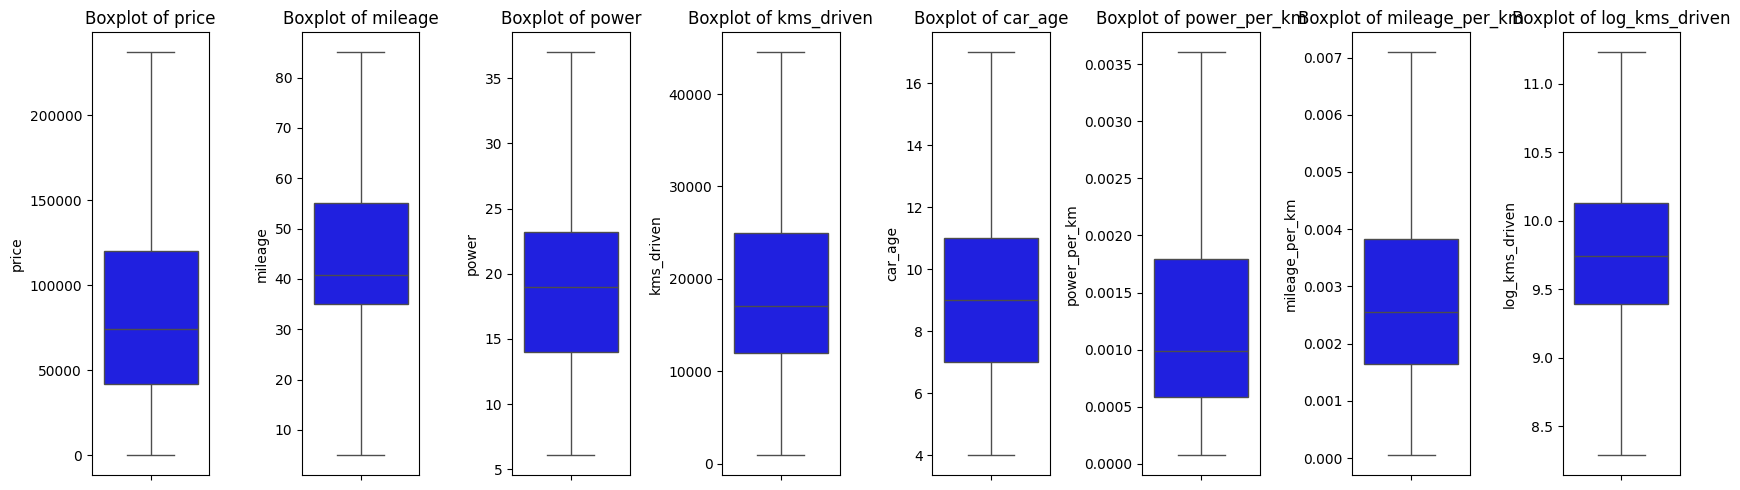

In [26]:
# Plotting boxplot after outlier removal
num_cols = ['price', 'mileage', 'power', 'kms_driven','car_age', 'power_per_km', 'mileage_per_km','log_kms_driven']
plt.figure(figsize=(17, 5))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 8, i)  
    sns.boxplot(y=df[col], color='blue')
    plt.title(f"Boxplot of {col}")
plt.tight_layout()  
plt.show()

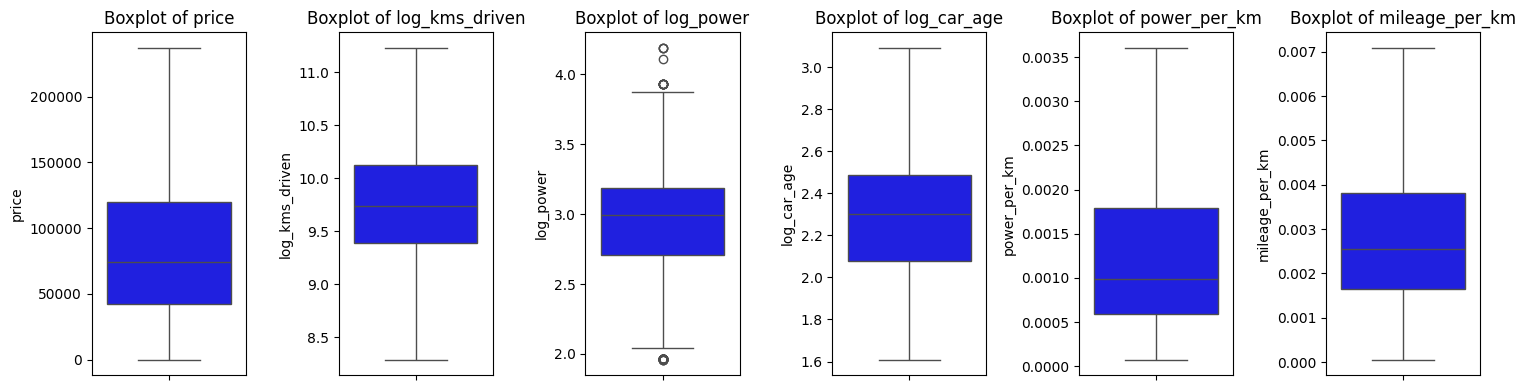

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define numerical columns for boxplots
num_cols = ['price', 'log_kms_driven', 'log_power', 'log_car_age', 'power_per_km', 'mileage_per_km']

# Set up the figure and axes
plt.figure(figsize=(15, 4))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 6, i)  # Create subplots (2 rows, 3 columns)
    sns.boxplot(y=df[col], color='blue')
    plt.title(f"Boxplot of {col}")

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


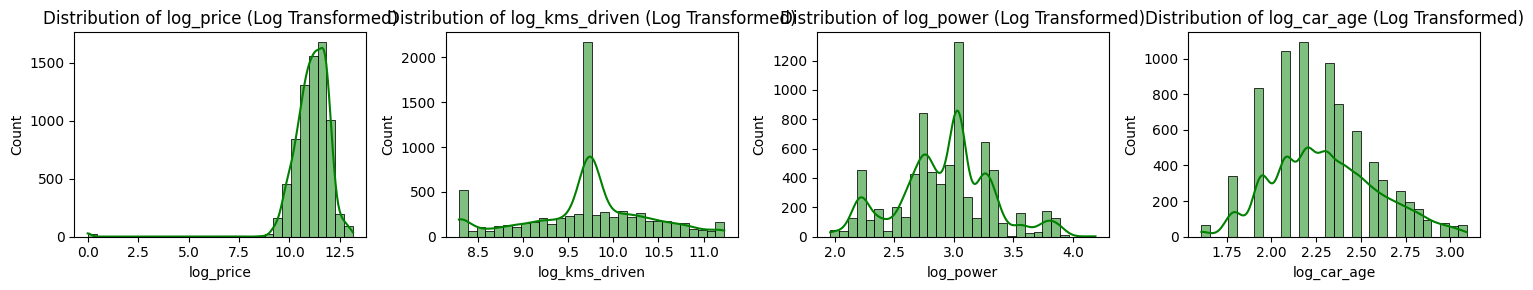

In [28]:
#Plotting Histplot after log transformation
transformed_cols = ['log_price', 'log_kms_driven', 'log_power', 'log_car_age']
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 3))
for i, col in enumerate(transformed_cols, 1):
    plt.subplot(1, 4, i)
    sns.histplot(df[col], bins=30, kde=True, color='green')
    plt.title(f'Distribution of {col} (Log Transformed)')
plt.tight_layout()
plt.show()

In [29]:
# Feature Scaling used standard scaler
scaler = StandardScaler()
df[['log_kms_driven', 'log_power', 'car_age', 'power_per_km', 'mileage_per_km']] = \
    scaler.fit_transform(df[['log_kms_driven', 'log_power', 'car_age', 'power_per_km', 'mileage_per_km']])

In [30]:
#Removing irrelevant columns before traininng
columns_to_drop = ["model_name", "kms_driven","location","mileage","power","car_age"]  
df = df.drop(columns=columns_to_drop)

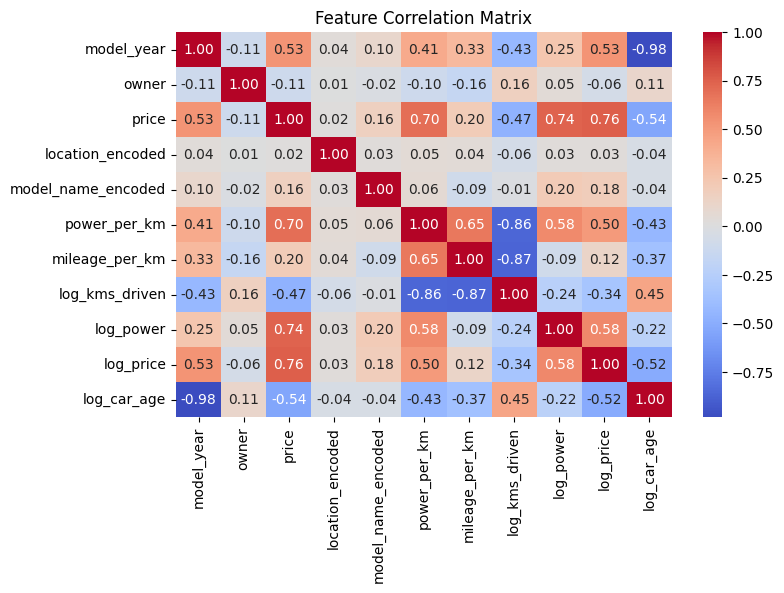

In [31]:
#Compute correlation only for numerical columns using heatmap
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# Model Building

In [32]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# ---- Define Features and Target ----
features = ['model_year', 'owner', 'location_encoded',
            'model_name_encoded', 'power_per_km', 'mileage_per_km',
            'log_kms_driven', 'log_power', 'log_car_age']

X = df[features]
y = df["price"]  # No log transformation!

# ---- Train-Test Split ----
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---- Scaling ----
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ---- Define Models ----
models = {
    "Random Forest": RandomForestRegressor(n_estimators=300, max_depth=7, min_samples_split=8, random_state=42),
    
    "XGBoost": XGBRegressor(
            n_estimators=600,
    learning_rate=0.01,
    max_depth=8,
    min_child_weight=5,
    gamma=7,
    subsample=0.80,
    colsample_bytree=0.77,
    reg_alpha=1,
    reg_lambda=10,
    eval_metric="mae",
    random_state=42
    ),
    
    "Gradient Boosting": GradientBoostingRegressor(
        n_estimators=600,
        learning_rate=0.06,
        max_depth=2,
        min_samples_split=5,
        min_samples_leaf=3,
        max_features="sqrt",
        subsample=0.9,
        random_state=42
    ),
    
    "Decision Tree": DecisionTreeRegressor(max_depth=5, random_state=42),
    "Linear Regression": LinearRegression()
}

# ---- Train & Evaluate Models ----
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)

    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Metrics
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    mae_test = mean_absolute_error(y_test, y_pred_test)

    # Cross-validation (5 folds)
    cv_r2 = np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='r2'))
    cv_rmse = np.sqrt(-np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')))
    cv_mae = -np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error'))

    results[name] = {
        "R² Train": r2_train,
        "R² Test": r2_test,
        "R² CV (Validation)": cv_r2,
        "RMSE Test": rmse_test,
        "RMSE CV (Validation)": cv_rmse,
        "MAE Test": mae_test,
        "MAE CV (Validation)": cv_mae
    }

    print(f"\n{name} Performance:")
    print(f"  - R² Score (Train)      : {r2_train:.4f}")
    print(f"  - R² Score (Test)       : {r2_test:.4f}")
    print(f"  - R² Score (Validation) : {cv_r2:.4f}")
    print(f"  - RMSE (Test)           : {rmse_test:.4f}")
    print(f"  - RMSE (Validation)     : {cv_rmse:.4f}")
    print(f"  - MAE (Test)            : {mae_test:.4f}")
    print(f"  - MAE (Validation)      : {cv_mae:.4f}")

# ---- Stacking Model ----
stacking_model = StackingRegressor(
    estimators=[
        ('rf', RandomForestRegressor(n_estimators=200, max_depth=6, random_state=42)),
        ('xgb', XGBRegressor(n_estimators=200, learning_rate=0.02, max_depth=6, random_state=42)),
        ('gb', GradientBoostingRegressor(n_estimators=400, learning_rate=0.04, max_depth=2, random_state=42))
    ],
    final_estimator=XGBRegressor(n_estimators=150, learning_rate=0.03, max_depth=4, random_state=42),
    passthrough=True
)

stacking_model.fit(X_train, y_train)

# Stacking Predictions
y_pred_stack = stacking_model.predict(X_test)

# Stacking Metrics
r2_stack = r2_score(y_test, y_pred_stack)
rmse_stack = np.sqrt(mean_squared_error(y_test, y_pred_stack))
mae_stack = mean_absolute_error(y_test, y_pred_stack)

print("\nStacking Model Performance:")
print(f"  - R² Score (Test)       : {r2_stack:.4f}")
print(f"  - RMSE (Test)           : {rmse_stack:.4f}")
print(f"  - MAE (Test)            : {mae_stack:.4f}")



Random Forest Performance:
  - R² Score (Train)      : 0.9110
  - R² Score (Test)       : 0.8779
  - R² Score (Validation) : 0.8884
  - RMSE (Test)           : 18923.7624
  - RMSE (Validation)     : 18670.3662
  - MAE (Test)            : 12582.9588
  - MAE (Validation)      : 12554.4501

XGBoost Performance:
  - R² Score (Train)      : 0.9456
  - R² Score (Test)       : 0.8949
  - R² Score (Validation) : 0.9083
  - RMSE (Test)           : 17557.5306
  - RMSE (Validation)     : 16925.6546
  - MAE (Test)            : 11309.0303
  - MAE (Validation)      : 11235.0033

Gradient Boosting Performance:
  - R² Score (Train)      : 0.9039
  - R² Score (Test)       : 0.8735
  - R² Score (Validation) : 0.8929
  - RMSE (Test)           : 19265.4234
  - RMSE (Validation)     : 18288.0674
  - MAE (Test)            : 12956.5661
  - MAE (Validation)      : 12499.2665

Decision Tree Performance:
  - R² Score (Train)      : 0.8429
  - R² Score (Test)       : 0.8298
  - R² Score (Validation) : 0.8309
  

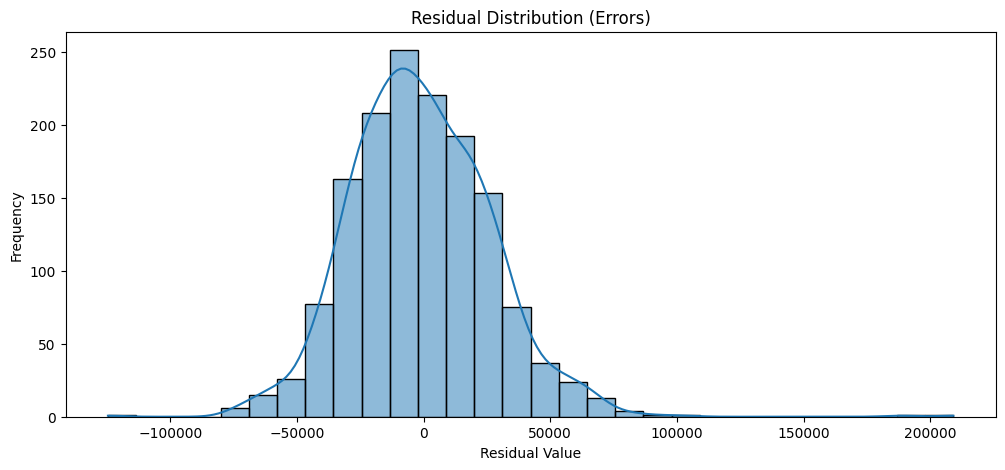

In [33]:
# ---- Residual Analysis ----
plt.figure(figsize=(12, 5))
sns.histplot(y_test - y_pred_test, bins=30, kde=True)
plt.title("Residual Distribution (Errors)")
plt.xlabel("Residual Value")
plt.ylabel("Frequency")
plt.show()

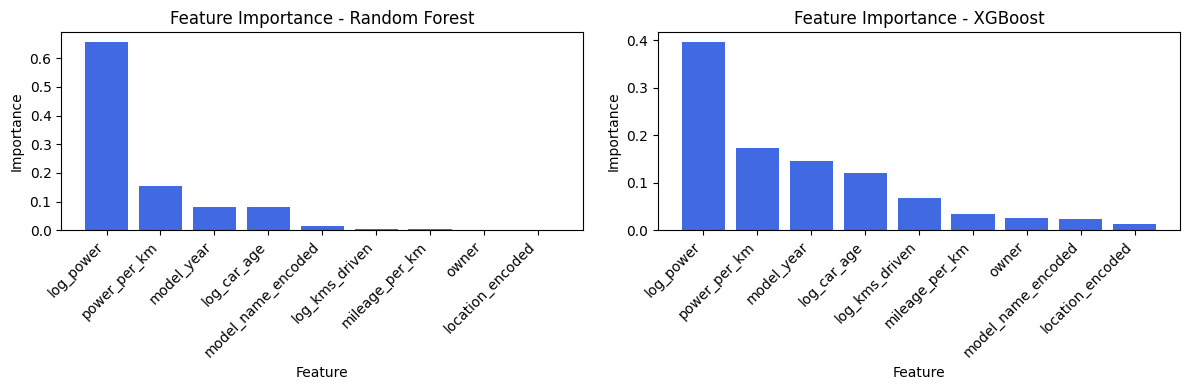

In [34]:
# ---- Feature Importance with Subplots ----
def plot_feature_importance(models, features):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns
    model_names = ["Random Forest", "XGBoost"]
    for i, model_name in enumerate(model_names):
        model = models[model_name]
        if hasattr(model, "feature_importances_"):
            importances = model.feature_importances_
            indices = np.argsort(importances)[::-1]
            axes[i].bar(range(len(features)), importances[indices], align="center", color="royalblue")
            axes[i].set_xticks(range(len(features)))
            axes[i].set_xticklabels(np.array(features)[indices], rotation=45, ha="right")
            axes[i].set_title(f"Feature Importance - {model_name}")
            axes[i].set_xlabel("Feature")
            axes[i].set_ylabel("Importance")
    plt.tight_layout()
    plt.show()
# Call function
plot_feature_importance(models, features)

In [35]:
sample_input = np.array([[2017, 1, 0.042892, 0.003182, -0.233739, -0.534171, 0.040323, 0.224885, 2.197225]])
sample_input = scaler.transform(sample_input)  # Apply the same scaling as training
predicted_price = models["XGBoost"].predict(sample_input) # Predict using XGBoost
print(f"Predicted Used Bike Price: {predicted_price[0]:,.2f}")

Predicted Used Bike Price: 121,339.98
